# Sensitivity Analysis

In [1]:
from model.pyrice import *
from model.enumerations import *
from dmdu.general.xlm_constants_epsilons import get_xlc, get_all_outcome_names
from ema_workbench import Model, ema_logging, load_results
import seaborn as sns
from ema_workbench.analysis import feature_scoring
import matplotlib.pyplot as plt
ema_logging.log_to_stderr(ema_logging.INFO)

<Logger EMA (DEBUG)>

In [2]:
model = PyRICE(model_specification=ModelSpec.STANDARD, welfare_function=WelfareFunction.UTILITARIAN)

model = Model("RICE", function=model)

model.uncertainties, model.levers, model.constants = get_xlc()

In [3]:
target_directory = os.path.join(os.getcwd(), 'data')

## Load Results
file_name = 'results_open_exploration_new_30000'
results = load_results(file_name=os.path.join(target_directory, file_name))


experiments, outcomes = results
outcomes = pd.DataFrame(outcomes)

[MainProcess/INFO] results loaded successfully from /Users/reddel/PycharmProjects/PyRICE_2022/optimization/exploration/data/results_open_exploration_new_30000


In [4]:
cleaned_experiments = experiments.drop(columns=[l.name for l in model.levers])

In [5]:
outcome_names = get_all_outcome_names()
outcome_names = [o + ' 2105' for o in outcome_names]

In [6]:
outcomes = outcomes.loc[:, outcome_names]
outcomes.columns = [c.split(' 2105')[0] for c in outcomes.columns]
outcomes = outcomes.rename(columns={
    'Distance to consumption threshold': 'Distance consumption',
    'Distance to damage threshold': 'Distance damage',
    'Population below consumption threshold': 'Population consumption',
    'Population above damage threshold': 'Population damage',
    'Intratemporal consumption Gini': 'Consumption Gini',
    'Intratemporal damage Gini': 'Damage Gini',
})

In [7]:
visualization_folder = os.path.join(
    os.path.dirname(os.getcwd()),
    'outputimages'
)

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because on

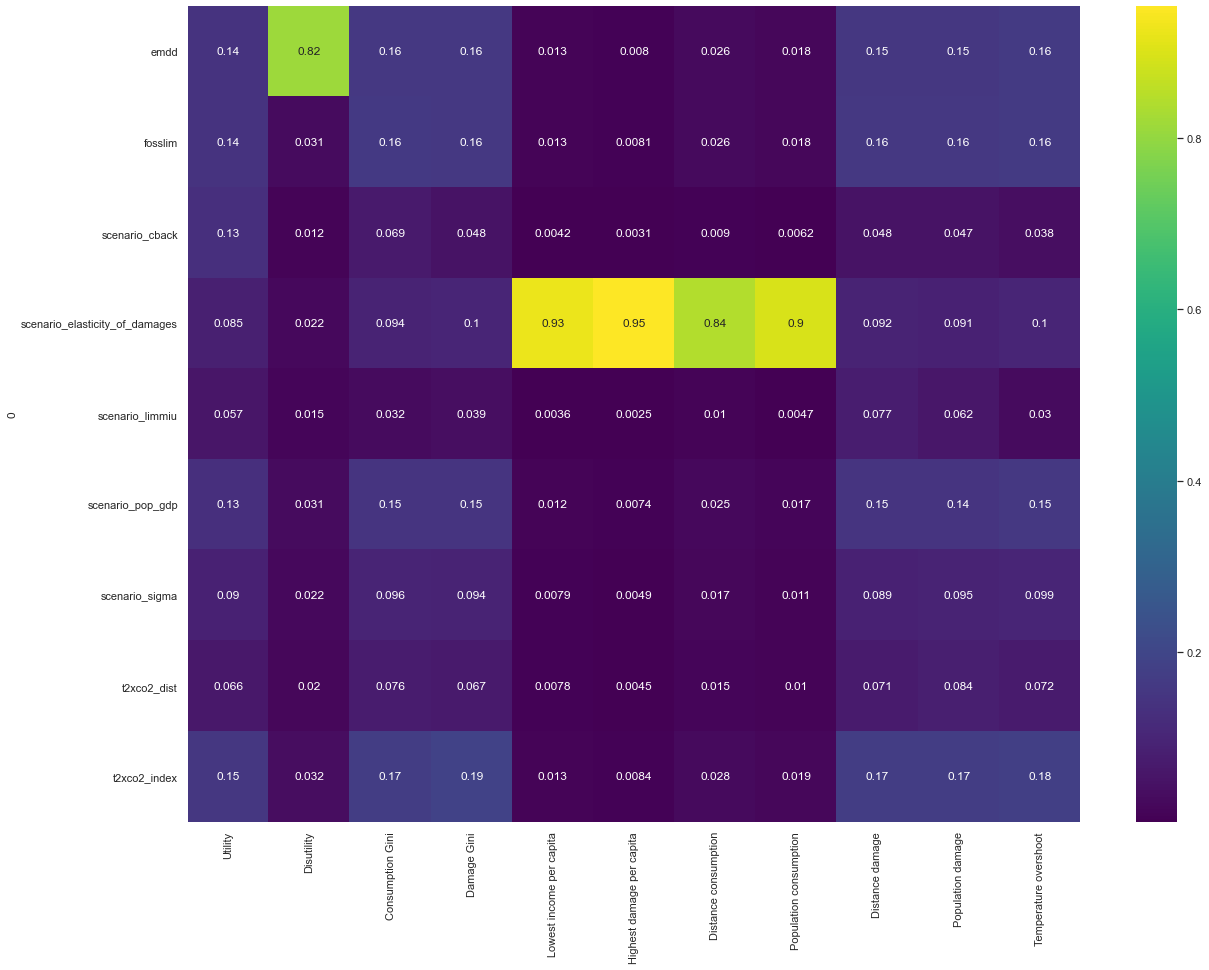

In [8]:
scores = feature_scoring.get_feature_scores_all(cleaned_experiments, outcomes)
sns.set(rc={'figure.figsize':(20, 15)})
sns.heatmap(scores, annot=True, cmap='viridis')

plt.savefig(os.path.join(visualization_folder, 'feature_scoring_30k.png'), dpi=200, bbox_inches='tight')
plt.show()

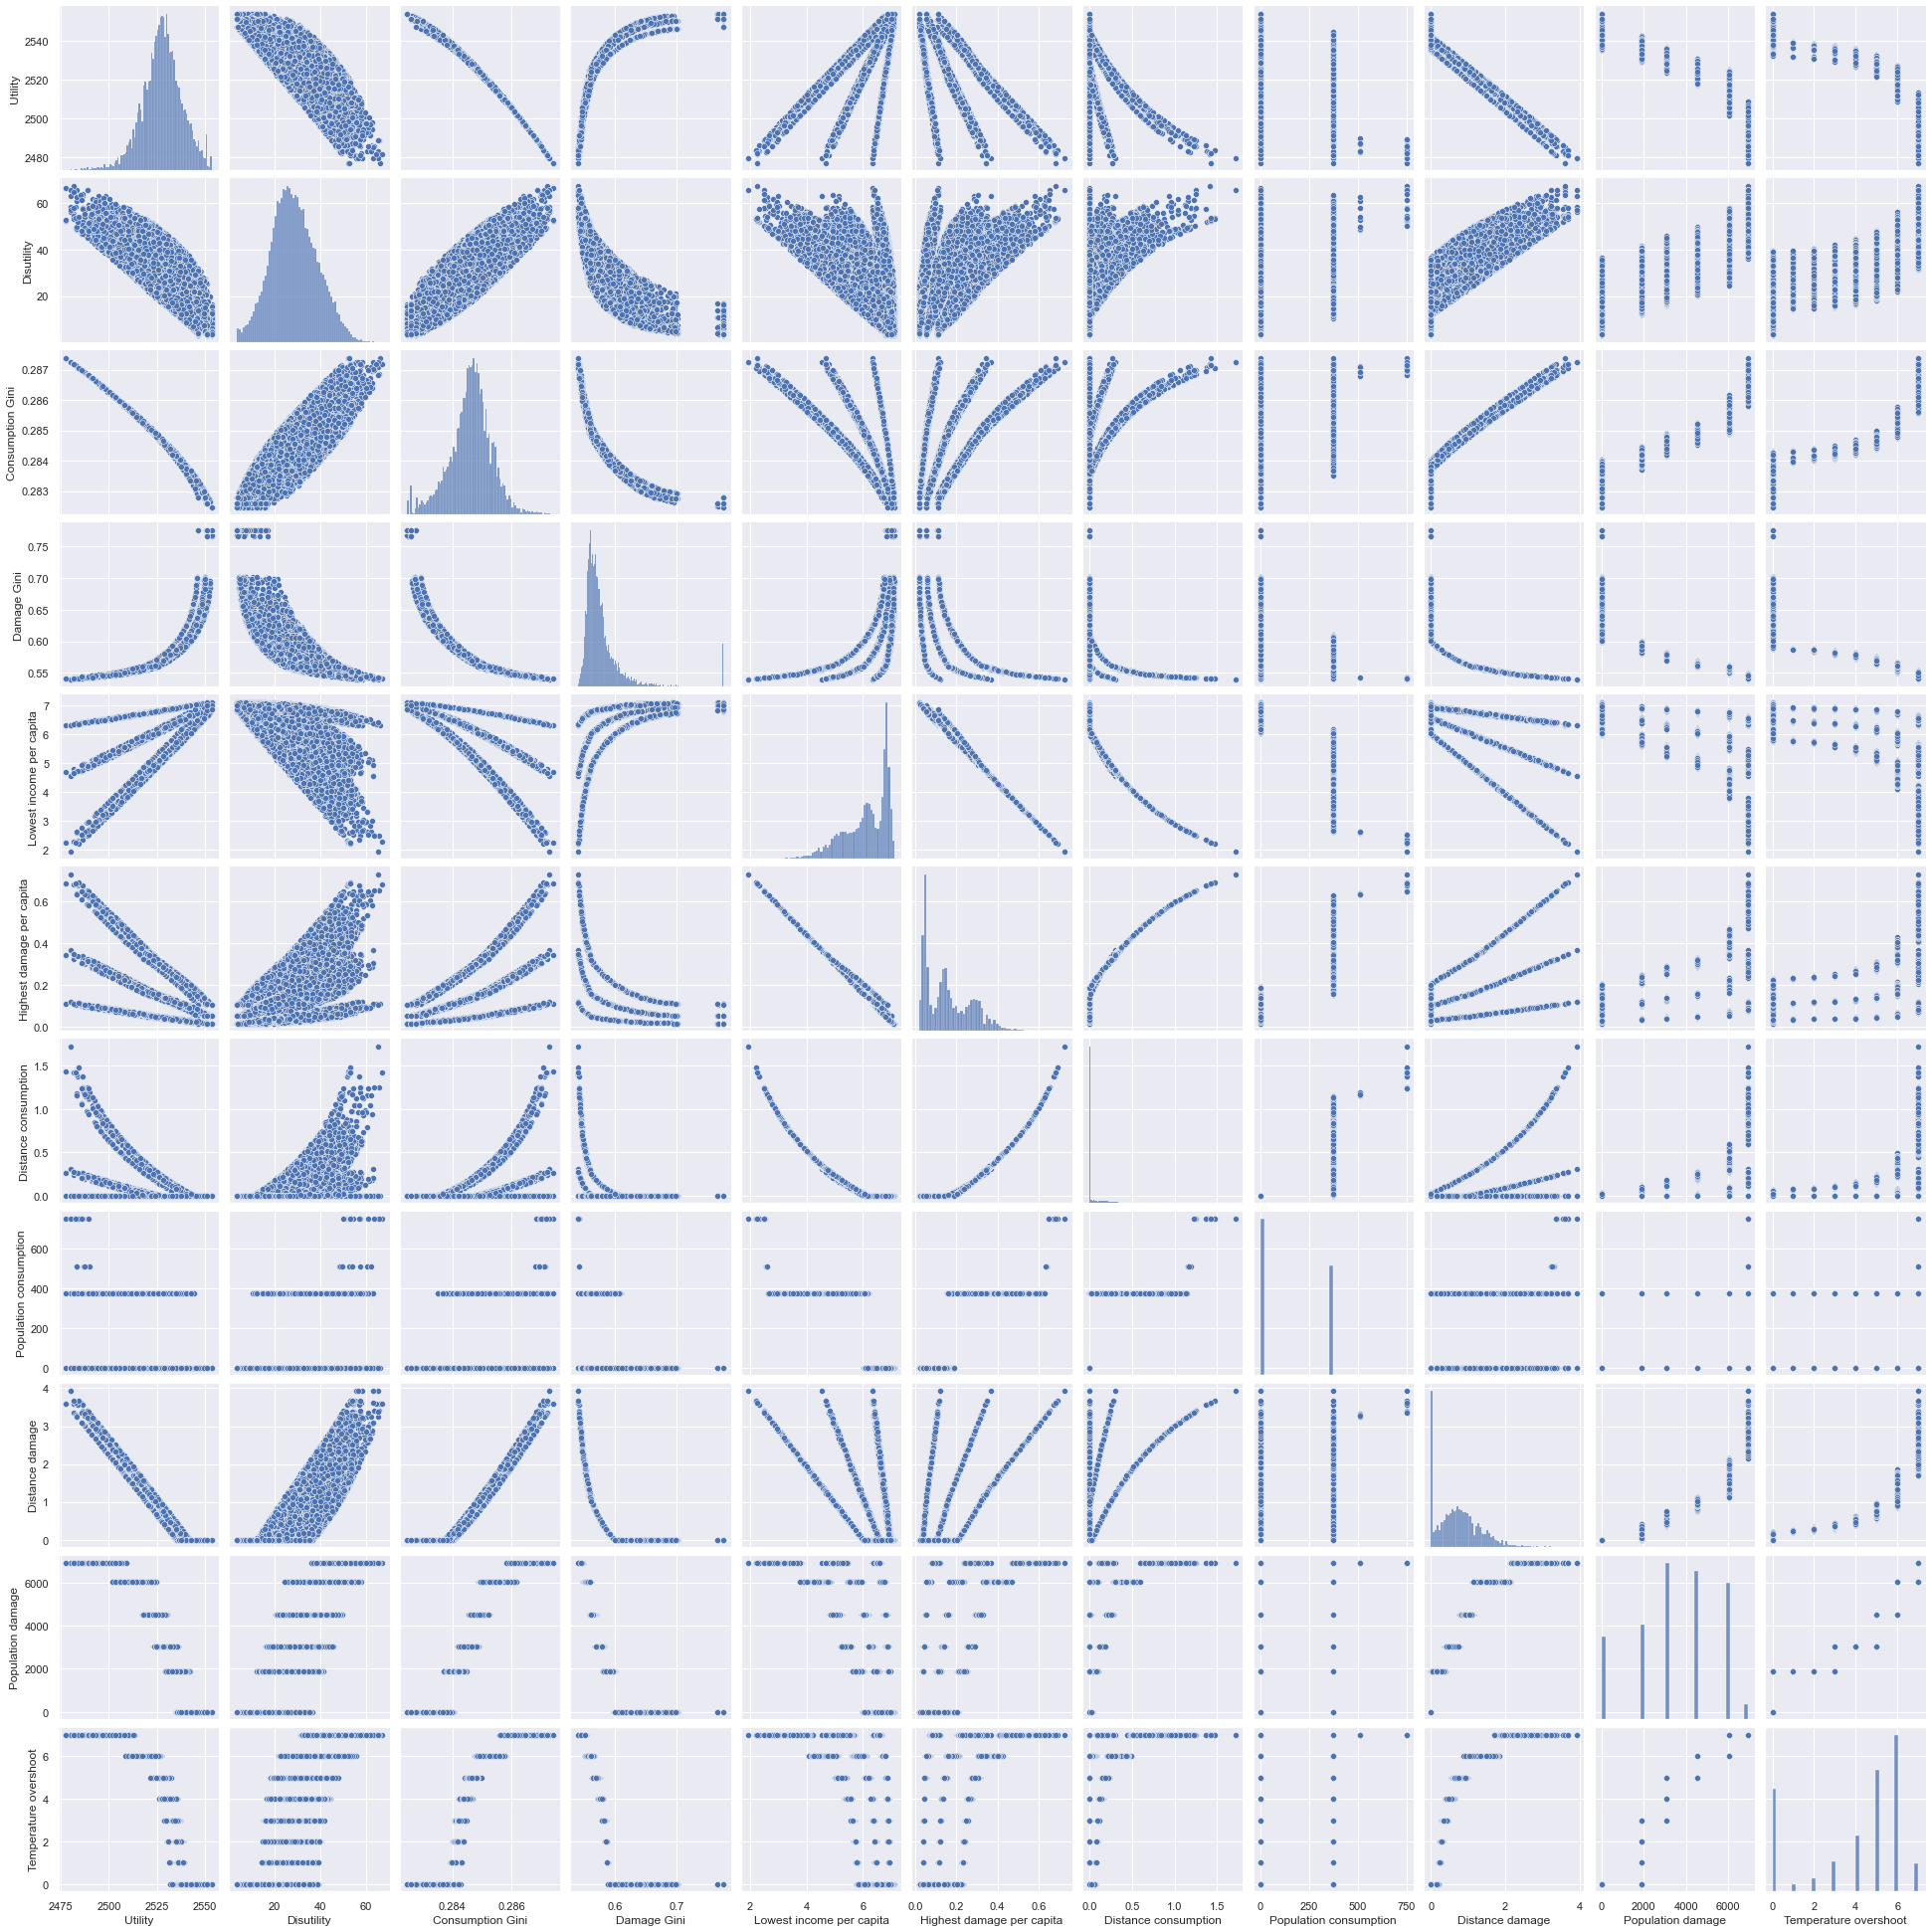

In [9]:
sns.pairplot(pd.DataFrame.from_dict(outcomes))
sns.set(rc={'figure.figsize':(40, 40)})
plt.savefig(os.path.join(visualization_folder, 'pairplot_30k.png'), dpi=200, bbox_inches='tight')
plt.show()